In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 


In [2]:
dataset = pd.read_csv('TSLA.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
dataset = dataset.rename(columns={'Adj Close':'Adj_Close'})

In [4]:
dataset.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


* Training the model till 31/12/2020 and dates after that will be used for evaluating the model
* Therefore, we would be splitting the training set and dataset accordingly

In [5]:
index = dataset.index[dataset['Date']=='2020-12-31']
index

Int64Index([2646], dtype='int64')

In [6]:
test_set = dataset[2647:]
train_set = dataset[:2647]

In [7]:
train_set

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010-06-29,3.80000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.15800,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.00000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.60000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.00000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2642,2020-12-24,642.98999,666.090027,641.000000,661.770020,661.770020,22865600
2643,2020-12-28,674.51001,681.400024,660.799988,663.690002,663.690002,32278600
2644,2020-12-29,661.00000,669.900024,655.000000,665.989990,665.989990,22910800
2645,2020-12-30,672.00000,696.599976,668.359985,694.780029,694.780029,42846000


In [8]:
test_set

,Date,Open,High,Low,Close,Adj_Close,Volume
2647,2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2648,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2649,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2650,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
2651,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


We would like to predict the trend using the Adjusted Close value of the stock.
* Since keras only takes numpy array, we need to convert our training data to numpy as well

In [9]:
train_set = train_set.iloc[:,5:6].values
type(train_set)

numpy.ndarray

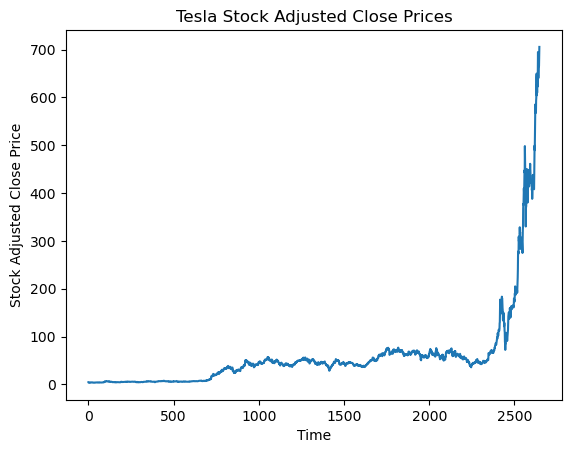

In [10]:
plt.plot(dataset['Adj_Close'][:2647])
plt.title("Tesla Stock Adjusted Close Prices")
plt.xlabel("Time")
plt.ylabel("Stock Adjusted Close Price")
plt.show()

In [11]:
! pip install statsmodels

In [12]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df['Close'] = df['Close'].apply(lambda x: float(x.replace(',', '')))

In [13]:
df

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.250000,332.830000,324.970000,663.590000,"7,380,500"
1,01/04/2012,331.270000,333.870000,329.080000,666.450000,"5,749,400"
2,01/05/2012,329.830000,330.750000,326.890000,657.210000,"6,590,300"
3,01/06/2012,328.340000,328.770000,323.680000,648.240000,"5,405,900"
4,01/09/2012,322.040000,322.290000,309.460000,620.760000,"11,688,800"
...,...,...,...,...,...,...
1504,22/12/2017,1061.109985,1064.199951,1059.439941,1060.119995,755100
1505,26/12/2017,1058.069946,1060.119995,1050.199951,1056.739990,760600
1506,27/12/2017,1057.390015,1058.369995,1048.050049,1049.369995,1271900
1507,28/12/2017,1051.599976,1054.750000,1044.770020,1048.140015,837100


In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
p_value = result[1]

p_value

0.4006026815491145

In [15]:
# df['Close_Diff'] = df['Close'].diff()
# df = df.dropna()


In [16]:
# res = adfuller(df['Close_Diff'])
# p_value = res[1]
# print(f'{p_value:.16f}')

In [17]:
# plt.plot(df['Close_Diff'])
# plt.show()

In [18]:
training_set = df.iloc[:, 4:5].values
training_set

array([[ 663.59    ],
       [ 666.45    ],
       [ 657.21    ],
       ...,
       [1049.369995],
       [1048.140015],
       [1046.400024]])

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [20]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-60: i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [22]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-07-21 06:32:31.087219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-21 06:32:31.087699: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100


2023-07-21 06:32:31.629364: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-21 06:32:33.126106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:32:33.630482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:32:33.803598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:32:33.937871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:32:34.072111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:32:34.282581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

46/46 [==============================] - 8s 97ms/step - loss: 0.0274
Epoch 2/100
46/46 [==============================] - 3s 70ms/step - loss: 0.0081
Epoch 3/100
46/46 [==============================] - 3s 66ms/step - loss: 0.0061
Epoch 4/100
46/46 [==============================] - 3s 65ms/step - loss: 0.0050
Epoch 5/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0050
Epoch 6/100
46/46 [==============================] - 3s 66ms/step - loss: 0.0045
Epoch 7/100
46/46 [==============================] - 3s 68ms/step - loss: 0.0037
Epoch 8/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0044
Epoch 9/100
46/46 [==============================] - 3s 66ms/step - loss: 0.0037
Epoch 10/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0034
Epoch 11/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0036
Epoch 12/100
46/46 [==============================] - 3s 65ms/step - loss: 0.0035
Epoch 13/100
46/46 [=================

In [37]:
regressor.save('my_lstm_model.h5')

In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [26]:
real_stock_price = dataset_test.iloc[:, 4: 5].values

In [27]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((df['Close'], dataset_test['Close']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

/var/folders/58/fz8921qx2fngl6byrhmxmd880000gn/T/ipykernel_45579/365282560.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [28]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = scaler.transform(inputs)

In [29]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
predicted_stock_price = regressor.predict(X_test)

2023-07-21 06:37:39.402675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:37:39.578622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:37:39.709831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-07-21 06:37:39.847219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/4 [======>.......................] - ETA: 3s

2023-07-21 06:37:39.982187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 155ms/step


In [31]:
#inverse the scaled value
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

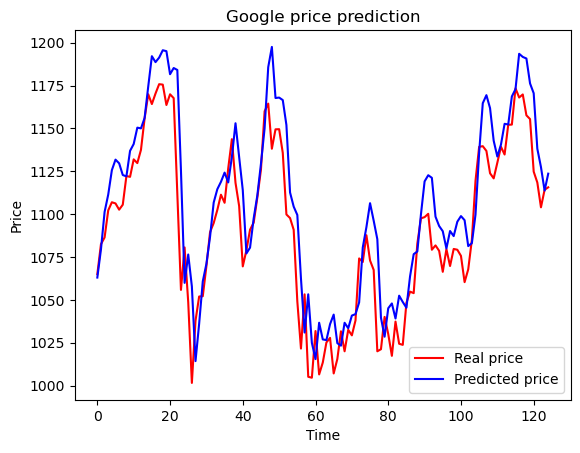

In [38]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
def calculate_mape(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Avoiding division by zero, replace any actual values of zero with a small epsilon
    epsilon = 1e-10
    actual_values = np.where(actual_values != 0, actual_values, epsilon)

    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
    return mape

In [41]:
mape_result = calculate_mape(real_stock_price, predicted_stock_price)
print("MAPE:", mape_result)

MAPE: 1.7475426267515322
